In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage.measure import compare_ssim as ssim
from math import log10, sqrt

In [2]:
img = cv2.imread('C:\\Users\\sutir\\OneDrive\\Documents\\School\\BG\\Sem 5\\Practicals\\misc\\4.2.06.tiff', 0) #main image
image = cv2.cvtColor(cv2.imread('C:\\Users\\sutir\\OneDrive\\Documents\\School\\BG\\Sem 5\\Practicals\\misc\\4.2.07.tiff'), cv2.COLOR_BGR2GRAY) #image to be hidden

Text(0.5, 1.0, 'Image to be hidden')

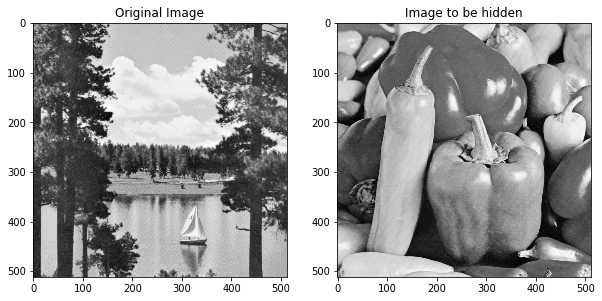

In [3]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img, 'gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(image, 'gray')
plt.title('Image to be hidden' )

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0 255 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


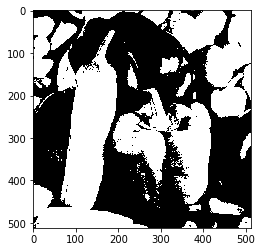

In [4]:
#Converting the image to be hidden to a binary image
thresh = 127
th, im_bw = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
plt.imshow(im_bw, cmap='gray')
print(im_bw)

In [5]:
# Bit plane slicing the main image 1
arr = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        arr.append(np.binary_repr(img[i][j], width = 8))

In [6]:
# Bit plane slicing the main image 2

eight = (np.array([int(i[0]) for i in arr]) * 128).reshape(img.shape[0],img.shape[1])
seven = (np.array([int(i[1]) for i in arr]) * 64).reshape(img.shape[0],img.shape[1])
six = (np.array([int(i[2]) for i in arr]) * 32).reshape(img.shape[0],img.shape[1])
five = (np.array([int(i[3]) for i in arr]) * 16).reshape(img.shape[0],img.shape[1])
four = (np.array([int(i[4]) for i in arr]) * 8).reshape(img.shape[0],img.shape[1])
three = (np.array([int(i[5]) for i in arr]) * 4).reshape(img.shape[0],img.shape[1])
two = (np.array([int(i[6]) for i in arr]) * 2).reshape(img.shape[0],img.shape[1])
one = (np.array([int(i[7]) for i in arr]) * 1).reshape(img.shape[0],img.shape[1])

In [7]:
print(eight)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ... 128 128 128]
 [  0 128 128 ... 128 128 128]
 ...
 [  0   0   0 ... 128 128 128]
 [  0   0   0 ... 128 128 128]
 [  0   0   0 ... 128 128 128]]


In [8]:
#Encoding
row, col = img.shape
print(str(row)+'  '+str(col))
for i in range (row):
    for j in range (col):
        if im_bw[i][j] == 255:
            one[i][j] = 1
        else: one[i][j] = 0
print(one)

512  512
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


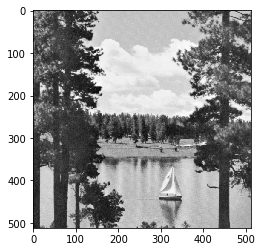

In [9]:
#Generating stego image
new_img = eight+seven+six+five+four+three+two+one
plt.imshow(new_img, cmap='gray')

In [10]:
#decoding
row, col = img.shape
merged = np.zeros(shape = [row, col, 3])
for i in range(row):
    for j in range(col):
        if one[i][j] == 1:
            merged[i][j] = 255
        else: merged[i][j] =0
#print(merged)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Hidden Image')

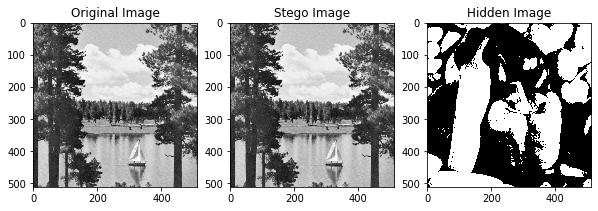

In [11]:
#output

#plt.imshow(new_img, cmap='gray')
#plt.imshow(merged, cmap='gray')
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(img, 'gray')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(new_img, 'gray')
plt.title('Stego Image')
plt.subplot(1,3,3)
plt.imshow(merged, 'gray')
plt.title('Hidden Image')

In [12]:
def mse(img1, img2):
    '''m, n = img.shape
    sum = 0
    for i in range(m):
        for j in range(n):
            sum += (img1[i][j]-img2[i][j])*(img1[i][j]-img2[i][j])
    mse=sum/(m*n)'''
    mse = np.mean( (img1 - img2) ** 2)
    return mse

In [13]:
print(mse(img, new_img))

0.5002517700195312


In [17]:
def psnr(img1, img2):
    mse1 = mse(img1, img2)
    if (mse1==0):
        psnr = 100
    max=255.0
    psnr = 20 * log10(max / sqrt(mse1))  
    return psnr

In [18]:
print(psnr(img, new_img))

51.13891726911275


In [19]:
print(ssim(img, new_img, multichannel= True))

C:\Users\sutir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.
C:\Users\sutir\Anaconda3\lib\site-packages\skimage\metrics\_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)


0.9980598731583727
